![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png) 
# **Watershed Algorithm for marker-based image segmentation** 
# Asosan bir biriga yopishib ketgan yoki ustiga ust chiqib ketgan objectlarni segmentation qilish uchun ishlatiladi

####**In this lesson we'll learn:**
1. How to use the Watershed algorithm for marker-based image segmentation

In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    
    plt.figure(figsize=(size * aspect_ratio,size))
    
    if image.ndim == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# **Watershed Algorthm Theory**

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. 

This algorithm uses that analogy and starts filling those low points (valleys) with a different colored label (aka our water). 

As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. 

The barriers you created gives you the segmentation result. This is the "philosophy" behind the watershed. You can visit the [CMM webpage](http://cmm.ensmp.fr/~beucher/wtshed.html) on watershed to understand it with the help of some animations.

Their approach however, gives you oversegmented result due to noise or any other irregularities in the image. 

Thus, OpenCV implemented a marker-based watershed algorithm where you specify which are all valley points are to be merged and which are not. It gives different labels for our object we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

# Briefly


The watershed algorithm is a classic algorithm used for segmentation and is especially useful when extracting touching or overlapping objects in images, such as the coins in the figure above.

Using traditional image processing methods such as thresholding and contour detection, we would be unable to extract each individual coin from the image — but by leveraging the watershed algorithm, we are able to detect and extract each coin without a problem.

When utilizing the watershed algorithm we must start with user-defined markers. These markers can be either manually defined via point-and-click, or we can automatically or heuristically define them using methods such as thresholding and/or morphological operations.

Ba'zi animatsiyalar yordamida tushunish uchun suv havzasidagi [CMM veb-sahifasiga](http://cmm.ensmp.fr/~beucher/wtshed.html) tashrif buyurishingiz mumkin.



# https://pyimagesearch.com/2015/11/02/watershed-opencv/ 

The watershed algorithm is a classic algorithm used for segmentation and is especially useful when extracting touching or overlapping objects in images, such as the coins in the figure above.

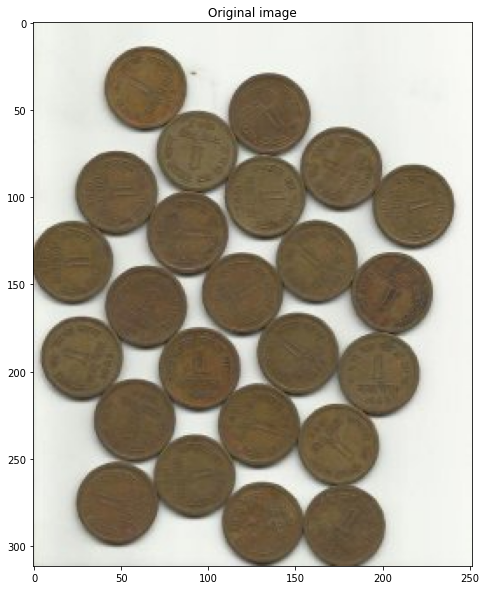

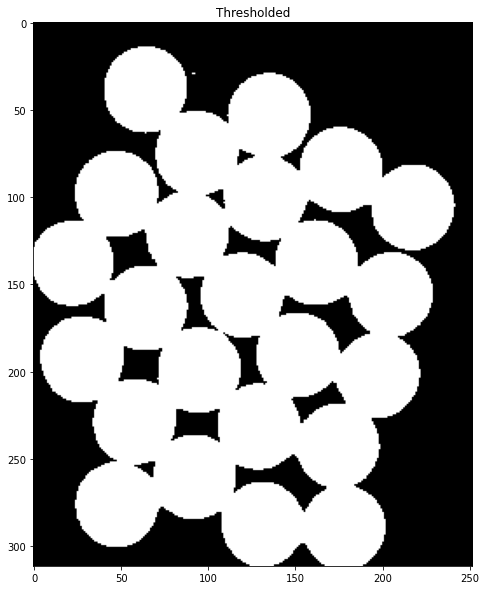

In [7]:
# Load image
img = cv2.imread('Datasets/images/water_coins.jpg')
imshow("Original image", img)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh)

## **Removing the touching masks**

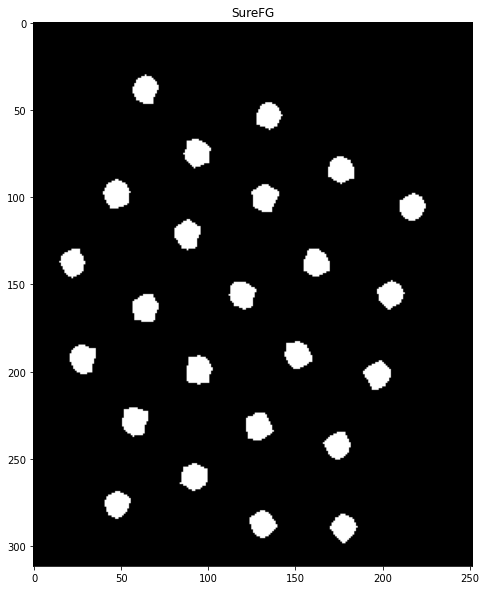

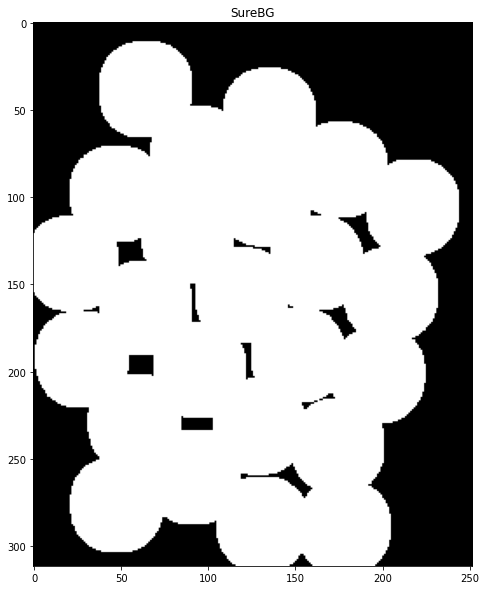

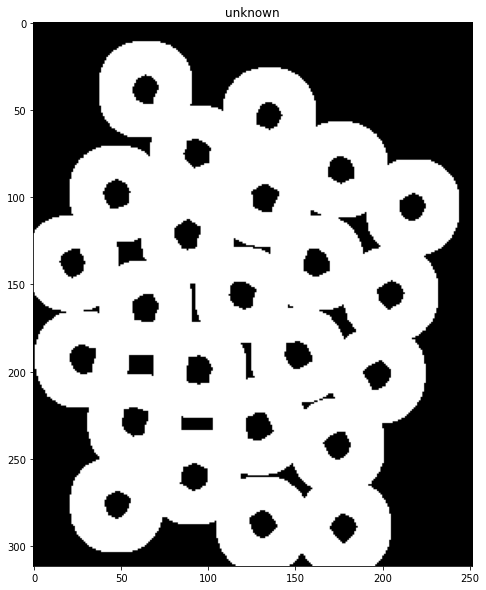

In [15]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Aniq oldingi maydonni topish
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow("SureFG", sure_fg)
imshow("SureBG", sure_bg)
imshow("unknown", unknown)

[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


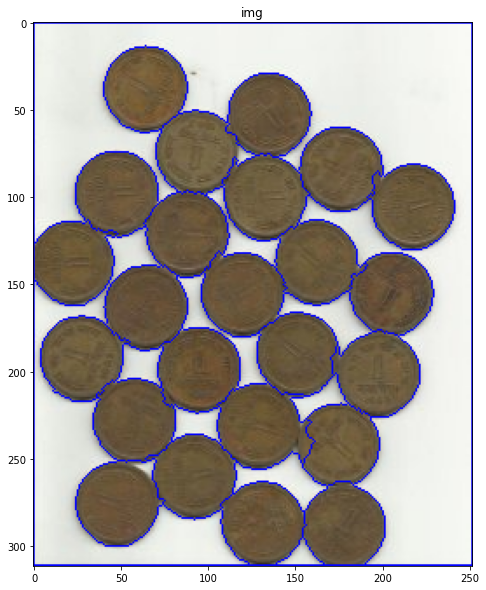

In [17]:
# Marker labelling
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv2.connectedComponents(sure_fg) 

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1


# Now, mark the region of unknown with zero
markers[unknown==255] = 0 #unknow rasmni oq ranglari qora bolib qoladi

markers = cv2.watershed(img, markers) #marker va rasmni yuboramiz watershed algoritmiga 
img[markers == -1] = [255,0,0] 

imshow("img", img)

# 2. Pyimagesearch usuli

In [23]:
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import imutils
import cv2

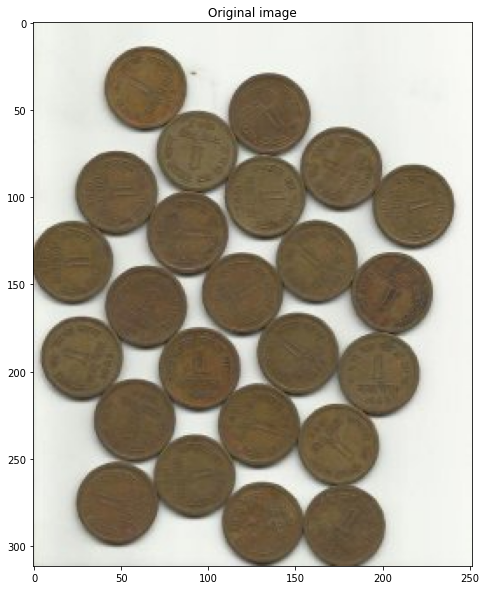

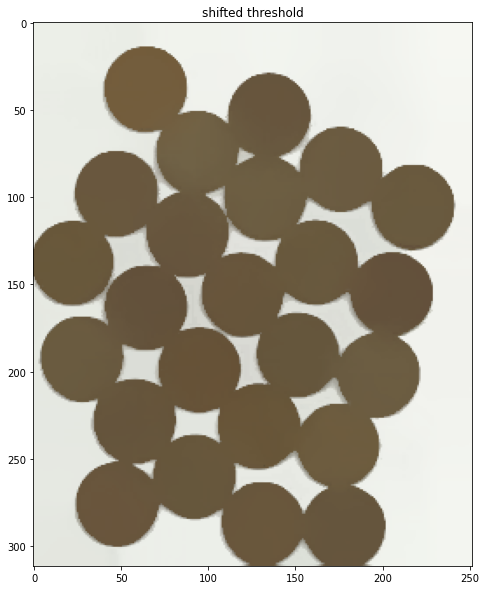

In [41]:
# Load image
img = cv2.imread('Datasets/images/water_coins.jpg')
imshow("Original image", img)

#thresholding qilish 3channeli rasmni pyramid mean shift filtering orqali
shifted = cv2.pyrMeanShiftFiltering(img,21,41 )
imshow("shifted threshold", shifted)


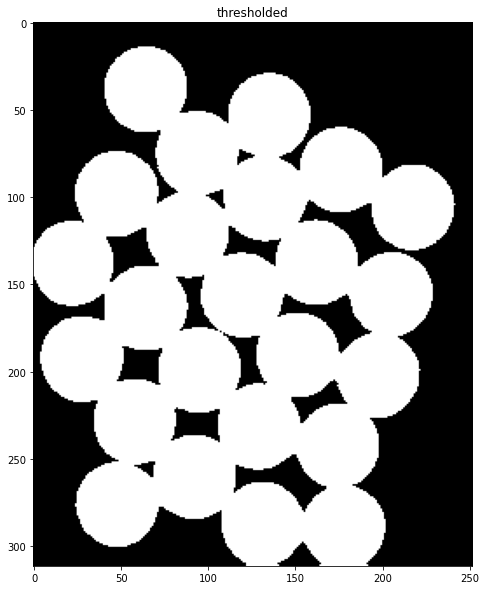

In [44]:
# Grayscale
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 
imshow('thresholded', thresh)

[INFO] 1 unique contours found


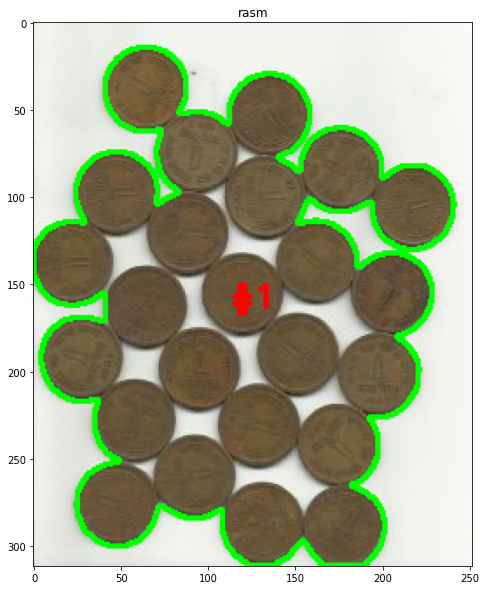

In [66]:
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print("[INFO] {} unique contours found".format(len(contours)))

for (i, c) in enumerate(contours):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
    
imshow('rasm', img)


Yuqorida korganimizdek, asosiy contour orqali topsak faqatgina 1 ta tanga bor deb ko'rayapti. Watershed algoritmidan foydalanib ajratamiz

## Pyimagesearch watershed

C:\Users\murod\AppData\Local\Temp\ipykernel_3016\3239611861.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)


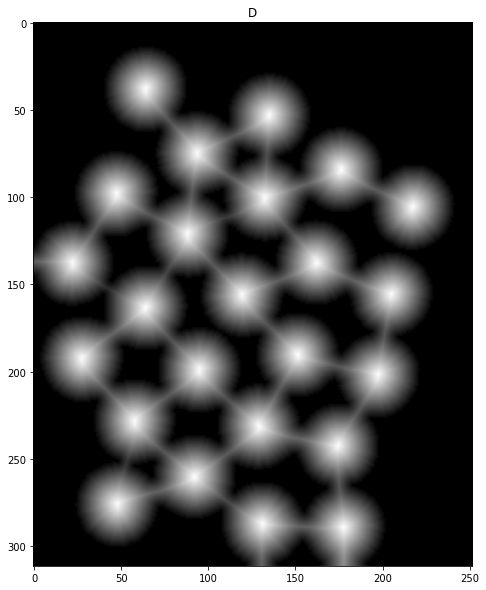

[INFO] 24 unique segments found


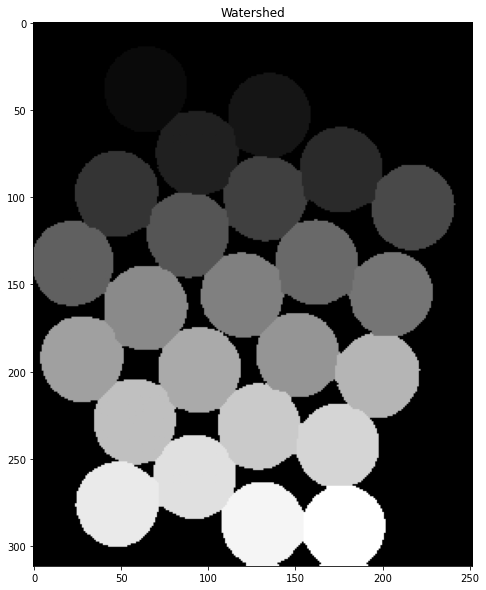

In [91]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map. at least a 20 pixel distance between each peak.
D = ndimage.distance_transform_edt(thresh) 
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)

imshow('D', D)
 #perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm 
markers = ndimage.label(localMax, structure=np.ones((3,3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
imshow('Watershed', labels)

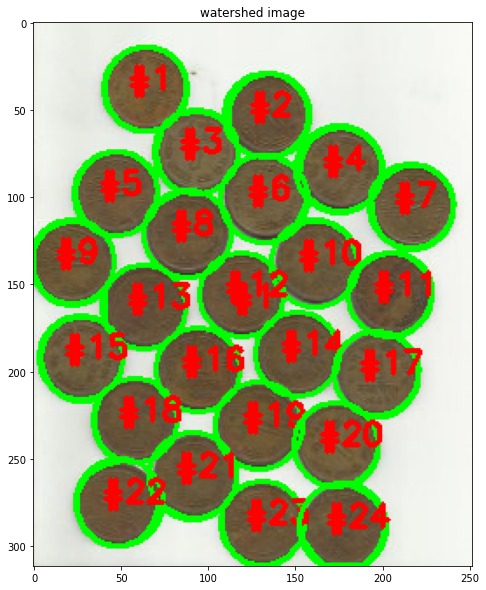

In [98]:
# loop over the unique labels returned by the Watershed
# algorithm

for label in np.unique(labels): 
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label==0:
        continue
        
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype='uint8')
    mask[labels==label] = 255 
   
    
    #detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(img, "#{}".format(label), (int(x) - 10, int(y)),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)   
imshow('watershed image', img)